In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import io
import seaborn as sns
import scipy.stats as stats
from google.colab import files

uploaded = files.upload()

Saving All_data_flow_Regime_1.csv to All_data_flow_Regime_1.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['All_data_flow_Regime_1.csv']))
# Dataset is now stored in a Pandas Dataframe
data['Regime'] = data['Regime'].astype('category') # encode 7 flow regime into 0 t0 6
data['Regime']=data['Regime'].cat.codes # encode 7 flow regime into 0 t0 6
X=data.iloc[:, 1:] # 22 Features
y=data.iloc[:, 0] # Traget 7 regimes
from collections import Counter
from sklearn import preprocessing,svm,metrics
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) #Split data into train =70% , test=30%

In [ ]:
y_train.value_counts() #Target 

0    101
4     39
2     37
1     33
6     31
3     16
5     15
Name: Regime, dtype: int64

In [ ]:
y_test.value_counts()

0    54
4    14
6    13
2    13
1    13
3     7
5     3
Name: Regime, dtype: int64

In [ ]:
data.head(4)

,Regime,Bond No,Convection No,FroudeL No,FroudeG No,FroudeLO No,FroudeGO No,Galileo_no,Kapitza no,ReL No,ReG No,ReLO No,ReGO No,Suratman L No,Suratman G No,WeL No,WeG No,WeLO No,WeGO No,PrL No,PrG No,PecletL No,PecletG No
0,0,168696.6394,0.222475,0.073057,42.162050,0.223571,229.777516,1.380545e+09,0.0026,10203.253080,95853.9805,17849.03281,223770.6165,8183.597019,40121.32307,12721.346520,229005.0495,38930.06601,1248046.798,1.194307,0.735125,12185.81822,70464.61078
1,0,168696.6394,0.201949,0.065627,48.243041,0.223571,229.777516,1.380545e+09,0.0026,9670.446137,102533.7003,17849.03281,223770.6165,8183.597019,40121.32307,11427.435670,262034.2227,38930.06601,1248046.798,1.194307,0.735125,11549.48307,75375.03657
2,0,168696.6394,0.180884,0.057574,55.742418,0.223571,229.777516,1.380545e+09,0.0026,9057.718149,110215.3782,17849.03281,223770.6165,8183.597019,40121.32307,10025.207480,302767.4228,38930.06601,1248046.798,1.194307,0.735125,10817.69764,81022.02625
3,0,168696.6394,0.160507,0.049418,64.508156,0.223571,229.777516,1.380545e+09,0.0026,8391.709459,118565.0281,17849.03281,223770.6165,8183.597019,40121.32307,8605.114289,350378.9209,38930.06601,1248046.798,1.194307,0.735125,10022.27870,87160.05857


In [ ]:
print(data['Regime'].unique()  )

[0 1 3 5 2 6 4]


In [ ]:
pip install XlsxWriter

     |████████████████████████████████| 153kB 8.0MB/s 


In [ ]:
#Encoded data saved
df=pd.DataFrame(data)
#df1(index=False)
#df1.to_string(index=False)
#print(df1)
writer = pd.ExcelWriter('RFC_True_Lable.xlsx', engine ='xlsxwriter')
df.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
X.head(5)

,Bond No,Convection No,FroudeL No,FroudeG No,FroudeLO No,FroudeGO No,Galileo_no,Kapitza no,ReL No,ReG No,ReLO No,ReGO No,Suratman L No,Suratman G No,WeL No,WeG No,WeLO No,WeGO No,PrL No,PrG No,PecletL No,PecletG No
0,168696.6394,0.222475,0.073057,42.162050,0.223571,229.777516,1.380545e+09,0.0026,10203.253080,95853.9805,17849.03281,223770.6165,8183.597019,40121.32307,12721.346520,229005.0495,38930.06601,1248046.798,1.194307,0.735125,12185.818220,70464.61078
1,168696.6394,0.201949,0.065627,48.243041,0.223571,229.777516,1.380545e+09,0.0026,9670.446137,102533.7003,17849.03281,223770.6165,8183.597019,40121.32307,11427.435670,262034.2227,38930.06601,1248046.798,1.194307,0.735125,11549.483070,75375.03657
2,168696.6394,0.180884,0.057574,55.742418,0.223571,229.777516,1.380545e+09,0.0026,9057.718149,110215.3782,17849.03281,223770.6165,8183.597019,40121.32307,10025.207480,302767.4228,38930.06601,1248046.798,1.194307,0.735125,10817.697640,81022.02625
3,168696.6394,0.160507,0.049418,64.508156,0.223571,229.777516,1.380545e+09,0.0026,8391.709459,118565.0281,17849.03281,223770.6165,8183.597019,40121.32307,8605.114289,350378.9209,38930.06601,1248046.798,1.194307,0.735125,10022.278700,87160.05857
4,168696.6394,0.148257,0.044377,70.644045,0.223571,229.777516,1.380545e+09,0.0026,7952.143720,124075.7971,17849.03281,223770.6165,8183.597019,40121.32307,7727.236519,383706.2748,38930.06601,1248046.798,1.194307,0.735125,9497.302187,91211.15994


In [ ]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Regime, dtype: int8

#RandomSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
########################### Hyperparameter tuning ###############################
n_estimators = [100,200, 300, 400,500, 600, 700, 800, 900, 1000, 1100, 1200]
#n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

forest=RandomForestClassifier()
gridF1 = RandomizedSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF1 = gridF1.fit(X_train, y_train)

print(bestF1.best_estimator_)
print("The mean accuracy of the model is:",bestF1.score(X_train, y_train) )

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.5s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
The mean accuracy of the model is: 0.9889705882352942


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


In [ ]:
bestF1.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
bestF1.best_params_ #Best parameter

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [ ]:
best_random_grid1=bestF1.best_estimator_

best_random_grid1.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
train_preds=best_random_grid1.predict(X_train)
test_preds=best_random_grid1.predict(X_test)

acc_train =best_random_grid1.score(X_train,y_train)
acc_test  =best_random_grid1.score(X_test,y_test)

print("RandomizedSearchCV accuracy on Training data:", acc_train)
print("RandomizedSearchCV accuracy on Test data:", acc_test )

print("cost of training model\n",metrics.confusion_matrix(y_train,train_preds))
print("cost of training model\n",metrics.classification_report(y_train,train_preds))

print("cost of testing model\n",metrics.confusion_matrix(y_test,test_preds))
print("cost of testing model\n",metrics.classification_report(y_test,test_preds))

RandomizedSearchCV accuracy on Training data: 0.9963235294117647
RandomizedSearchCV accuracy on Test data: 0.9658119658119658
cost of training model
 [[101   0   0   0   0   0   0]
 [  0  33   0   0   0   0   0]
 [  0   0  37   0   0   0   0]
 [  0   0   0  16   0   0   0]
 [  0   0   0   0  39   0   0]
 [  0   0   0   0   1  14   0]
 [  0   0   0   0   0   0  31]]
cost of training model
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        16
           4       0.97      1.00      0.99        39
           5       1.00      0.93      0.97        15
           6       1.00      1.00      1.00        31

    accuracy                           1.00       272
   macro avg       1.00      0.99      0.99       272
weighted avg       1.00      1.00      1.00       272

cost of tes

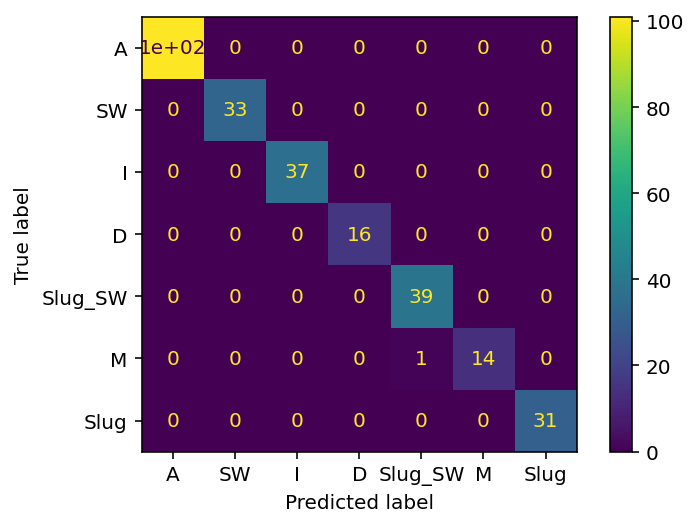

In [ ]:
from sklearn.metrics import plot_confusion_matrix

class_names = ['A', 'SW', 'I', 'D', 'Slug_SW', 'M', 'Slug']#############################

plot_confusion_matrix(best_random_grid1, X_train, y_train, display_labels=class_names)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

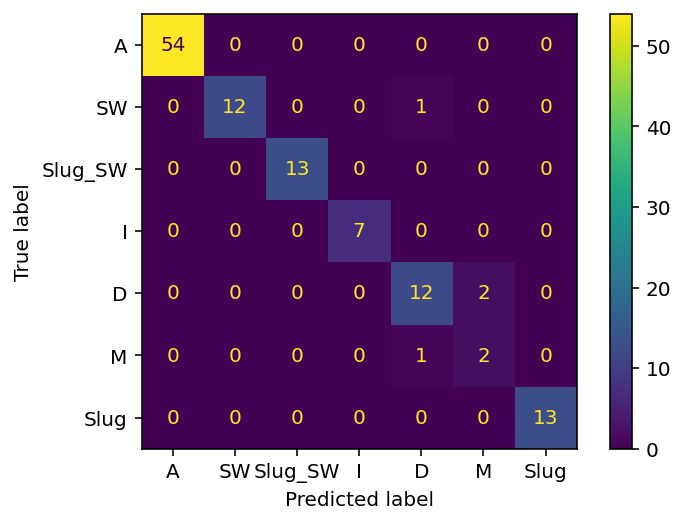

In [ ]:
from sklearn.metrics import plot_confusion_matrix

class_names = ['A', 'SW', 'Slug_SW', 'I', 'D', 'M', 'Slug' ]#############################

plot_confusion_matrix(best_random_grid1, X_test, y_test, display_labels=class_names)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

#SHAP

In [ ]:
pip install shap

     |████████████████████████████████| 327kB 8.6MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463906 sha256=17820b419c5f541701b4429b078d261a9646bd076542bf6413969ea7c530b3c9
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


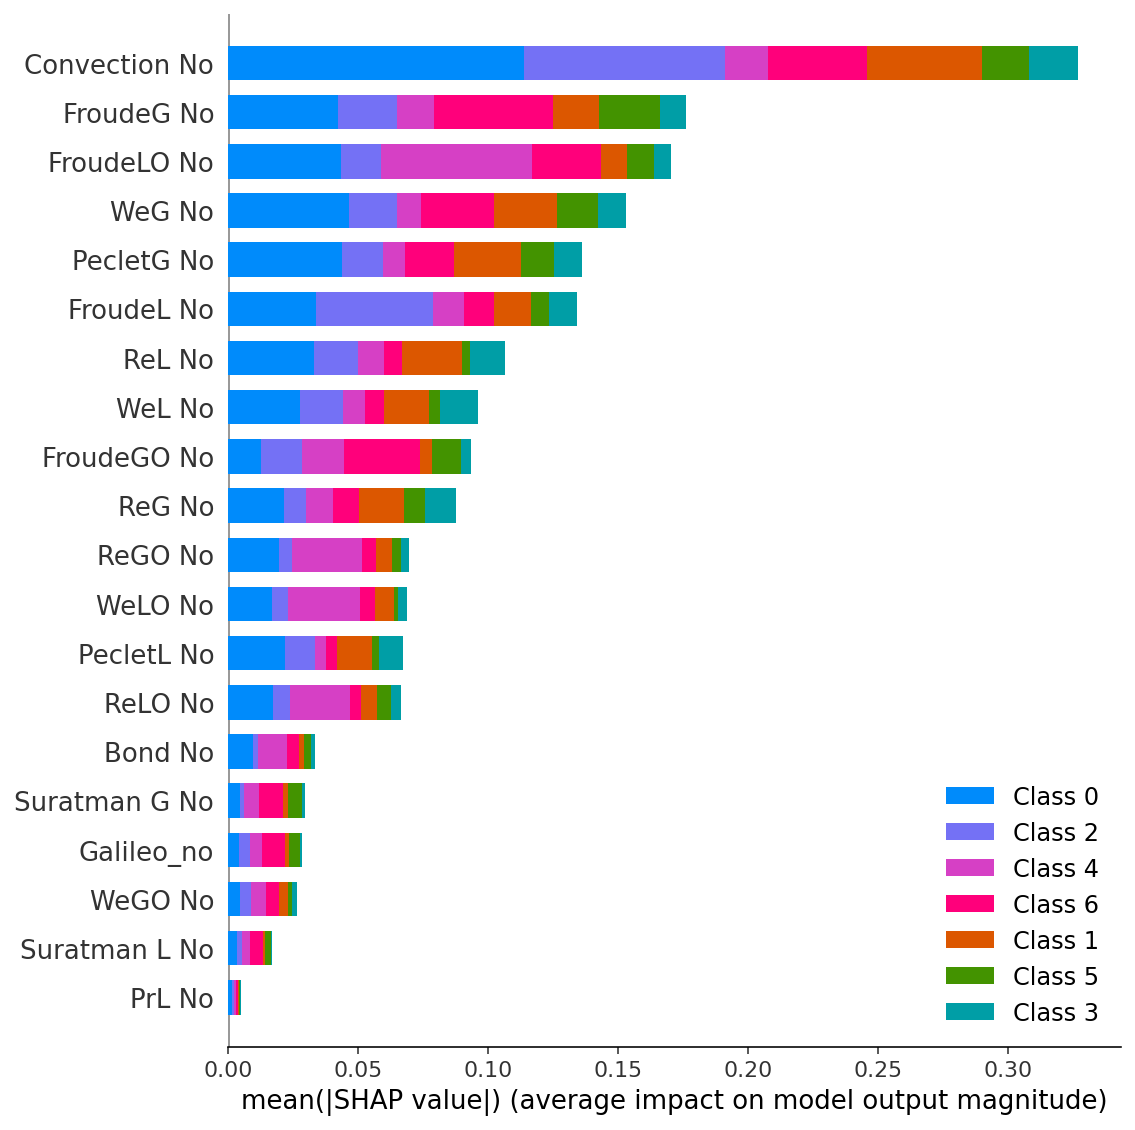

In [ ]:
import shap  # package used to calculate Shap values
# Create object that can calculate shap values
explainer = shap.TreeExplainer(best_random_grid1)
# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X)
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, X)

#Result

In [ ]:
uploaded = files.upload()

Saving Features.csv to Features.csv
Saving In_10_1.csv to In_10_1.csv
Saving In_10_2.csv to In_10_2.csv
Saving In_11_1.csv to In_11_1.csv
Saving In_11_2.csv to In_11_2.csv
Saving In_11_3.csv to In_11_3.csv
Saving In_11_4.csv to In_11_4.csv
Saving In_12_1.csv to In_12_1.csv
Saving In_12_2.csv to In_12_2.csv
Saving In_12_3.csv to In_12_3.csv
Saving In_12_4.csv to In_12_4.csv


In [ ]:
All_data = pd.read_csv(io.BytesIO(uploaded['Features.csv']))
Xnew = All_data
ynew= best_random_grid1.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('Results_All_data_RFC.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#10

In [ ]:
R10_1 = pd.read_csv(io.BytesIO(uploaded['In_10_1.csv']))
Xnew = R10_1
ynew= best_random_grid1.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('RFR_10_1.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R10_2 = pd.read_csv(io.BytesIO(uploaded['In_10_2.csv']))
Xnew = R10_2
ynew= best_random_grid1.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('RFR_10_2.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#11

In [ ]:
Xnew  = pd.read_csv(io.BytesIO(uploaded['In_11_1.csv']))
ynew= best_random_grid1.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('RFR_11_1.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
Xnew  = pd.read_csv(io.BytesIO(uploaded['In_11_2.csv']))
ynew= best_random_grid1.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('RFR_11_2.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
Xnew  = pd.read_csv(io.BytesIO(uploaded['In_11_3.csv']))
ynew= best_random_grid1.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('RFR_11_3.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
Xnew  = pd.read_csv(io.BytesIO(uploaded['In_11_4.csv']))
ynew= best_random_grid1.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('RFR_11_4.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#12

In [ ]:
Xnew  = pd.read_csv(io.BytesIO(uploaded['In_12_1.csv']))
ynew= best_random_grid1.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('RFR_12_1.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
Xnew  = pd.read_csv(io.BytesIO(uploaded['In_12_2.csv']))
ynew= best_random_grid1.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('RFR_12_2.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
Xnew  = pd.read_csv(io.BytesIO(uploaded['In_12_3.csv']))
ynew= best_random_grid1.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('RFR_12_3.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
Xnew  = pd.read_csv(io.BytesIO(uploaded['In_12_4.csv']))
ynew= best_random_grid1.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('RFR_12_4.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#______________________________________________________________________________

#GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

forest=RandomForestClassifier()
gridF = GridSearchCV(forest, hyperF, cv = 2, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

print(bestF.best_estimator_)
print("The mean accuracy of the model is:",bestF.score(X_train, y_train) )

Fitting 2 folds for each of 500 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  9.6min


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
The mean accuracy of the model is: 1.0


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 12.0min finished


In [ ]:
bestF.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
bestF.best_params_

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
best_random_grid=bestF.best_estimator_

best_random_grid.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
train_preds=best_random_grid.predict(X_train)
test_preds=best_random_grid.predict(X_test)

acc_train =best_random_grid.score(X_train,y_train)
acc_test  =best_random_grid.score(X_test,y_test)

print("RandomizedSearchCV accuracy on Training data:", acc_train)
print("RandomizedSearchCV accuracy on Test data:", acc_test )

print("cost of training model\n",metrics.confusion_matrix(y_train,train_preds))
print("cost of training model\n",metrics.classification_report(y_train,train_preds))

print("cost of testing model\n",metrics.confusion_matrix(y_test,test_preds))
print("cost of testing model\n",metrics.classification_report(y_test,test_preds))

RandomizedSearchCV accuracy on Training data: 1.0
RandomizedSearchCV accuracy on Test data: 0.9487179487179487
cost of training model
 [[101   0   0   0   0   0   0]
 [  0  33   0   0   0   0   0]
 [  0   0  37   0   0   0   0]
 [  0   0   0  16   0   0   0]
 [  0   0   0   0  39   0   0]
 [  0   0   0   0   0  15   0]
 [  0   0   0   0   0   0  31]]
cost of training model
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        39
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        31

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272

cost of testing model
 [[5

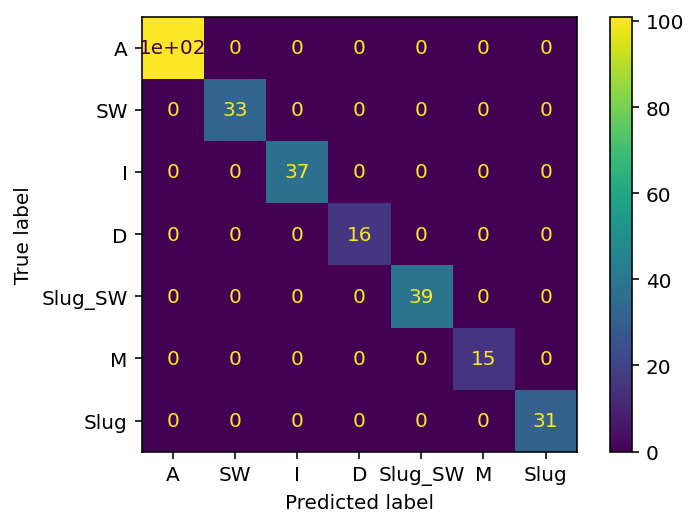

In [ ]:
from sklearn.metrics import plot_confusion_matrix

class_names = ['A', 'SW', 'I', 'D', 'Slug_SW', 'M', 'Slug']#############################

plot_confusion_matrix(best_random_grid, X_train, y_train, display_labels=class_names)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

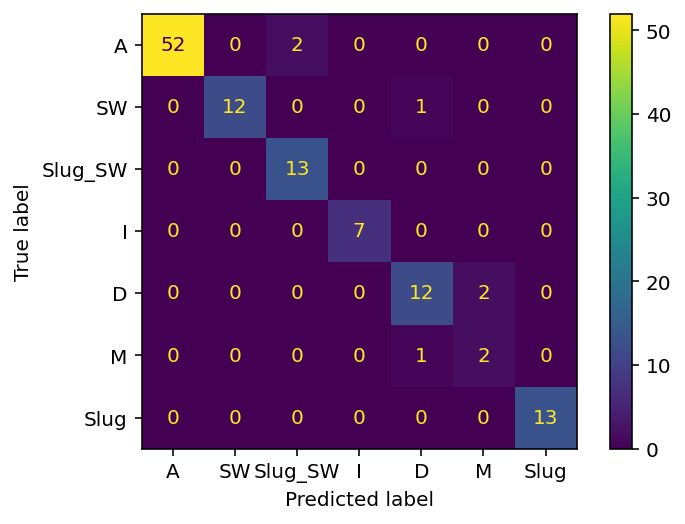

In [ ]:
from sklearn.metrics import plot_confusion_matrix

class_names = ['A', 'SW', 'Slug_SW', 'I', 'D', 'M', 'Slug' ]#############################

plot_confusion_matrix(best_random_grid, X_test, y_test, display_labels=class_names)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

#SHAP

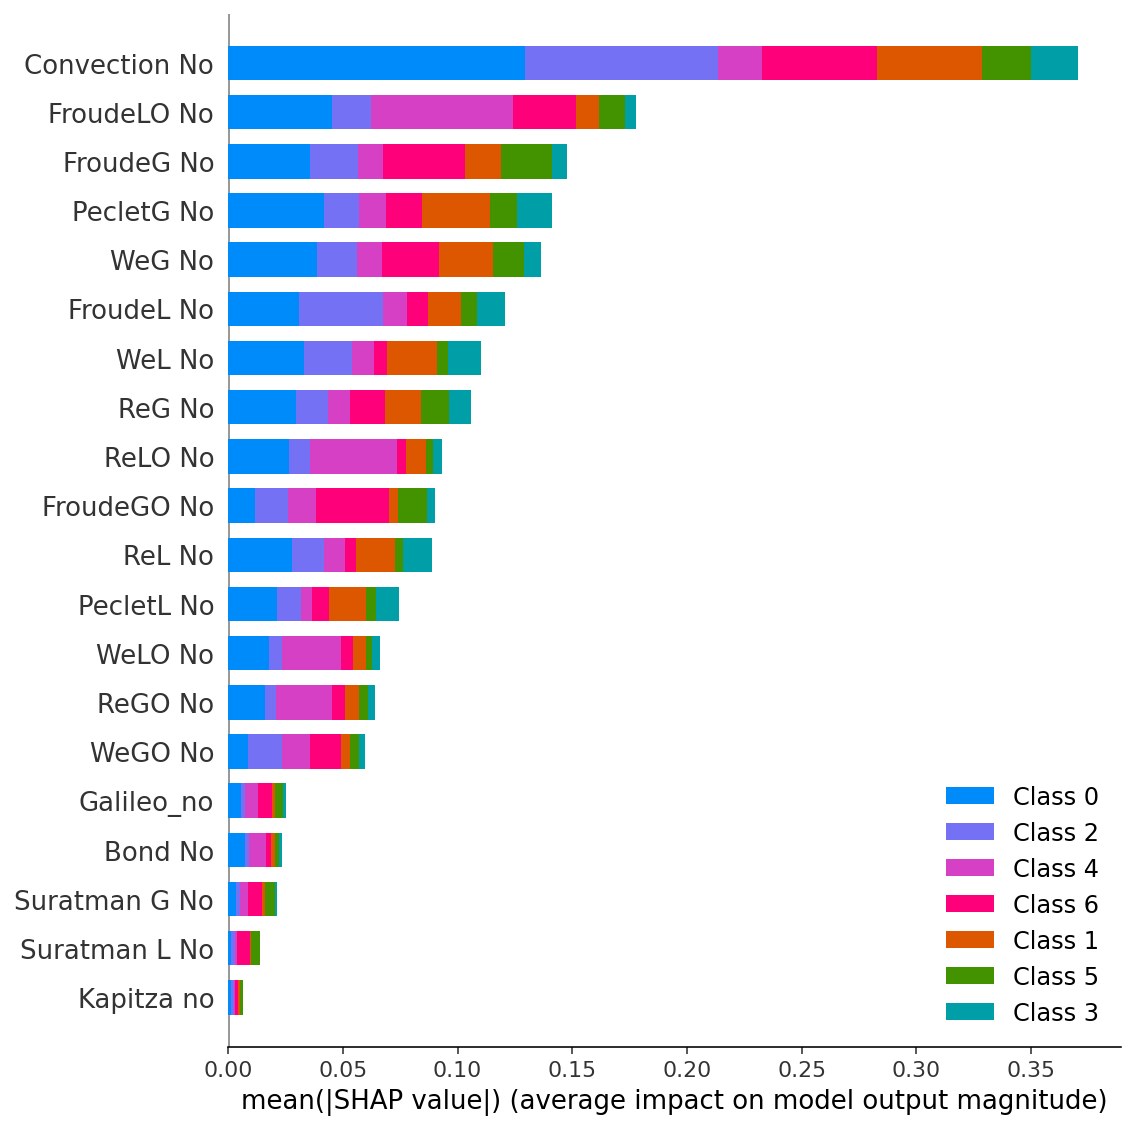

In [ ]:
import shap  # package used to calculate Shap values
# Create object that can calculate shap values
explainer = shap.TreeExplainer(best_random_grid)
# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X)
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, X)

#Result

In [ ]:
All_data = pd.read_csv(io.BytesIO(uploaded['Features.csv']))
Xnew = All_data
ynew= best_random_grid.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('All_data_RFC.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#10

In [ ]:
R10_1 = pd.read_csv(io.BytesIO(uploaded['In_10_1.csv']))
Xnew = R10_1
ynew= best_random_grid.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('R_10_1.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R10_2 = pd.read_csv(io.BytesIO(uploaded['In_10_2.csv']))
Xnew = R10_2
ynew= best_random_grid.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('R_10_2.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#11

In [ ]:
R11_1 = pd.read_csv(io.BytesIO(uploaded['In_11_1.csv']))
Xnew = R11_1
ynew= best_random_grid.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('R_11_1.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R11_2 = pd.read_csv(io.BytesIO(uploaded['In_11_2.csv']))
Xnew = R11_2
ynew= best_random_grid.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('R_11_2.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R11_3 = pd.read_csv(io.BytesIO(uploaded['In_11_3.csv']))
Xnew = R11_3
ynew= best_random_grid.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('R_11_3.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R11_4 = pd.read_csv(io.BytesIO(uploaded['In_11_4.csv']))
Xnew = R11_4
ynew= best_random_grid.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('R_11_4.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#12

In [ ]:
R12_1 = pd.read_csv(io.BytesIO(uploaded['In_12_1.csv']))
Xnew = R12_1
ynew= best_random_grid.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('R_12_1.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R12_2 = pd.read_csv(io.BytesIO(uploaded['In_12_2.csv']))
Xnew = R12_2
ynew= best_random_grid.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('R_12_2.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R12_3 = pd.read_csv(io.BytesIO(uploaded['In_12_3.csv']))
Xnew = R12_3
ynew= best_random_grid.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('R_12_3.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R12_4 = pd.read_csv(io.BytesIO(uploaded['In_12_4.csv']))
Xnew = R12_4
ynew= best_random_grid.predict(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('R_12_4.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()